In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import numpy as np

### Age Distribution Visualization
We re-create age distribution demographic visualization using our selected countries and year based on tutorial by Oscar Leo, https://github.com/oscarleoo/age-distribution-tutorial

In [34]:
# Import all functions from age_dist_visual.py
sys.path.append('../src/visualization')
from age_dist_visual import (
    set_seaborn_style, create_age_distribution, format_ticks,
    add_legend, create_image_from_figure, add_padding_to_chart,
    generate_country_figure, create_grid
)

We use data from the World Bank's Population Estimates and Projections database (latest version, updated December 2024). The dataset spans from 1960 to 2050, including actual historical data through 2024, and projections from 2025 onward. We visualize the data on total population and the age-group ratio for female and male.

https://datacatalog.worldbank.org/search/dataset/0037655/Population-Estimates-and-Projections

In [35]:
# Load data
population_female = pd.read_csv("../data/raw/secondary/population_absolute_female.csv", index_col=None)
population_male = pd.read_csv("../data/raw/secondary/population_absolute_male.csv", index_col=None)
population_ratio_female = pd.read_csv("../data/raw/secondary/population_ratio_female.csv", index_col=None)
population_ratio_male = pd.read_csv("../data/raw/secondary/population_ratio_male.csv", index_col=None)

# Set styles
font_family = "PT Mono"
background_color = "#253D5B"
grid_color = "#355882"
text_color = "#EEEEEE"
set_seaborn_style(font_family, background_color, grid_color, text_color)

### Creating One Plot

#### Absolute value

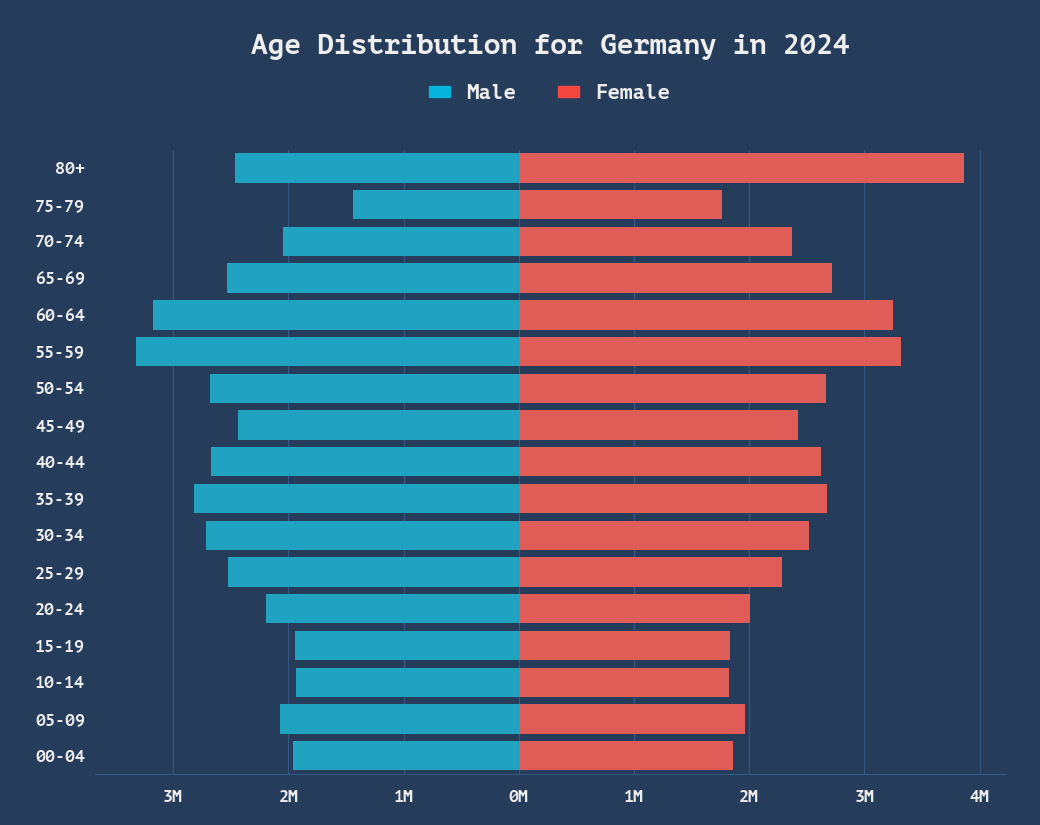

In [36]:
country_code = "DEU"
year = "2024"

country_name = population_female[population_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_female, population_male, country_code, year)
format_ticks(ax, xformat="millions")
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

#### Percentage Ratio

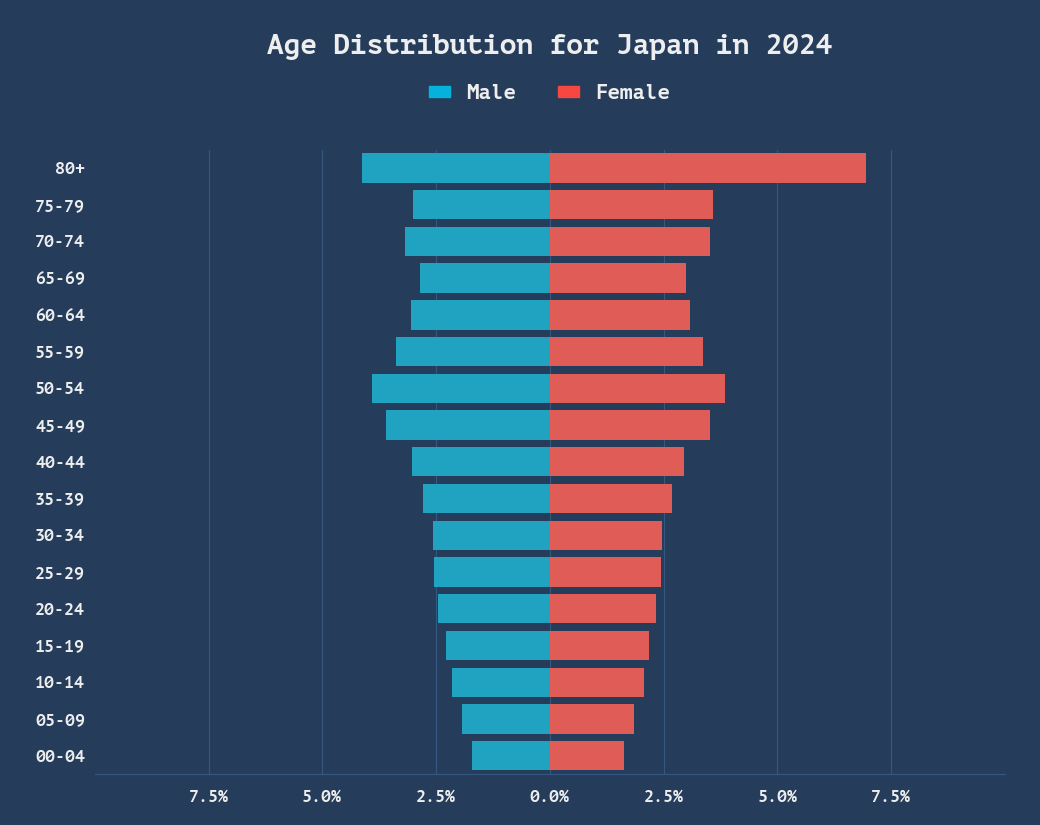

In [37]:
country_code = "JPN"
year = "2024"

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
# Create plot
fig = plt.figure(figsize=(10, 8))
ax = create_age_distribution(population_ratio_female, population_ratio_male, country_code, year)
format_ticks(ax, xformat="percentage", xlim=(-10, 10))
add_legend(x=0.5, y=1.09, background_color=background_color)
plt.title(f"Age Distribution for {country_name} in {year}", y=1.14, fontsize=20)

# Convert to image and add padding
image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
image

### Creating Grid Figures

In [38]:

country_codes = [
    'AND', 'ARG', 'AUS', 'ARM', 'BGD', 'BOL', 'BRA', 'CAN', 'CHL', 'CHN', 'COL', 'CYP', 'CZE', 'ECU', 'EGY', 'ETH',
    'DEU', 'GRC', 'GBR', 'GTM', 'HKG', 'IRL', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'LBN',
    'LBY', 'MDV', 'MEX', 'MYS', 'MNG', 'MAR', 'MMR', 'NLD', 'NZL', 'NIC', 'NGA', 'PAK', 'PER', 'PHL', 'PRI', 'ROU',
    'RUS', 'SGP', 'SRB', 'SVK', 'KOR', 'TJK', 'THA', 'TUR', 'TUN', 'UKR', 'USA', 'URY', 'UZB', 'VEN', 'VNM', 'ZWE'
] 
#Our default countries from World Survey which represent world condition
year = "2024"

# Generate figures
figures = []
for code in country_codes:
    country_name = population_ratio_female[population_ratio_female.country_code == code]["country_name"].iloc[0]
    image = generate_country_figure(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=code,
        year=year,
        background_color=background_color
    )
    figures.append(image)

# Display grid
grid = create_grid(figures, pad=20, ncols=4)
grid

### Creating Time Lapse 

In [39]:
images = []
years = [year for year in population_ratio_male.columns[4:] if 2000 <= int(year) <= 2025]  # Year columns start from index 4
country_code = "JPN"  

country_name = population_ratio_female[population_ratio_female.country_code == country_code]["country_name"].iloc[0]
for year in years:
    fig = plt.figure(figsize=(10, 8))

    ax = create_age_distribution(
        female_df=population_ratio_female,
        male_df=population_ratio_male,
        country_code=country_code,
        year=year
    )

    format_ticks(ax, xformat="percentage", xlim=(-10, 10))
    add_legend(x=0.5, y=1.09, background_color=background_color)

    plt.title(f"Age Distribution for {country_name} in     ", y=1.14, fontsize=21)
    plt.text(x=0.77, y=1.15, s=str(year), fontsize=21, transform=ax.transAxes)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 20, 5, background_color)
    images.append(image)

In [40]:
# Add pause at the end
images = images + [images[-1]] * 20
# Save to gif in ./reports/figures
imageio.mimsave("../reports/figures/time-lapse.gif", images, duration=0.15)


### Health Expenditure Projection

### Preparing the data

In [41]:
df_GDPpercapita = pd.read_csv("../data/processed/GDP_percapita_clean.csv", index_col=None)
df_health = pd.read_csv("../data/processed/health_expenditure_clean.csv", index_col=None)
df_dependency_ratio = pd.read_csv("../data/processed/dependency_ratio_clean.csv", index_col=None)
df_dependency_ratio_old = pd.read_csv("../data/processed/dependency_ratio_old_clean.csv", index_col=None)
df_dependency_ratio_young = pd.read_csv("../data/processed/dependency_ratio_young_clean.csv", index_col=None)
df_population = pd.read_csv("../data/processed/pop_total_clean.csv", index_col=None)
df_income_level = pd.read_csv("../data/processed/income_level_clean.csv", index_col=None)


In [42]:
merged = df_population.merge(df_dependency_ratio_old, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_dependency_ratio_young, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_health, on=["ISO3", "Year", "Country"], how="outer") 
merged = merged.merge(df_GDPpercapita, on=["ISO3", "Year", "Country"], how="outer")
merged = merged.merge(df_income_level, on=["ISO3", "Country"], how="left")


In [43]:
merged = merged.rename(columns={
    'Dependency_Ratio_x': 'Dependency_Ratio_Old',
    'Dependency_Ratio_y': 'Dependency_Ratio_Young'
})

# List of ISO3 codes to exclude
exclude_countries = ["HKG", "PRI", "VEN", "ZWE"]

# Filter them out
merged = merged[~merged["ISO3"].isin(exclude_countries)].reset_index(drop=True)

# Create a new column with natural log of GDP per capita
merged["log_GDP_percapita"] = np.log(merged["GDP_percapita"])

merged

Country ISO3  Year   Population  Dependency_Ratio_Old  \
0     Argentina  ARG  2000   37213984.0             15.536781   
1     Argentina  ARG  2001   37624825.0             15.603500   
2     Argentina  ARG  2002   38029349.0             15.666158   
3     Argentina  ARG  2003   38424282.0             15.703744   
4     Argentina  ARG  2004   38815916.0             15.735470   
...         ...  ...   ...          ...                   ...   
2749    Vietnam  VNM  2046  109827659.0             27.751280   
2750    Vietnam  VNM  2047  109930239.0             28.599491   
2751    Vietnam  VNM  2048  109994024.0             29.590990   
2752    Vietnam  VNM  2049  110018019.0             30.663002   
2753    Vietnam  VNM  2050  110008908.0             31.741932   

      Dependency_Ratio_Young  Health_Expenditure  GDP_percapita  \
0                  45.303162            8.220011    7637.014892   
1                  44.838589            8.371799    7141.475077   
2                  44.343860            7.393312    2569.699635   
3                  43.812028            6.894516    3320.477751   
4                  43.255411            7.228683    4242.020991   
...                      ...                 ...            ...   
2749               26.795876                 NaN            NaN   
2750               26.847097                 NaN            NaN   
2751               26.892552                 NaN            NaN   
2752               26.914605                 NaN            NaN   
2753               26.898406                 NaN            NaN   

             income_level  log_GDP_percapita  
0     Upper middle income           8.940762  
1     Upper middle income           8.873675  
2     Upper middle income           7.851544  
3     Upper middle income           8.107864  
4     Upper middle income           8.352795  
...                   ...                ...  
2749  Lower middle income                NaN  
2750  Lower middle income                NaN  
2751  Lower middle income                NaN  
2752  Lower middle income                NaN  
2753  Lower middle income                NaN  

[2754 rows x 10 columns]

### GDP per capita projection using log-linear regression

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [45]:
# Placeholder to collect all updated rows
results = []

# Loop by country
for country, group in merged.groupby("Country"):
    group = group.sort_values("Year").copy()

    # Subset to years with valid log GDP
    train = group[(group["Year"] < 2023) & (group["log_GDP_percapita"].notna())]

    if len(train) >= 5:  # at least 5 points to estimate trend
        X = train[["Year"]]
        y = train["log_GDP_percapita"] 

        model = LinearRegression().fit(X, y)

        # Predict future values for 2024–2050
        group_future = group[group["Year"] >= 2023].copy()
        X_future = group_future[["Year"]]
        y_pred_log = model.predict(X_future)

        # Update the log_GDP_percapita column with projected values
        group_future["log_GDP_percapita"] = y_pred_log

        # recover GDP_percapita
        group_future["GDP_percapita"] = np.exp(y_pred_log)

        # Update main group
        group.update(group_future)

    results.append(group)

# Combine all countries
df_updated = pd.concat(results)


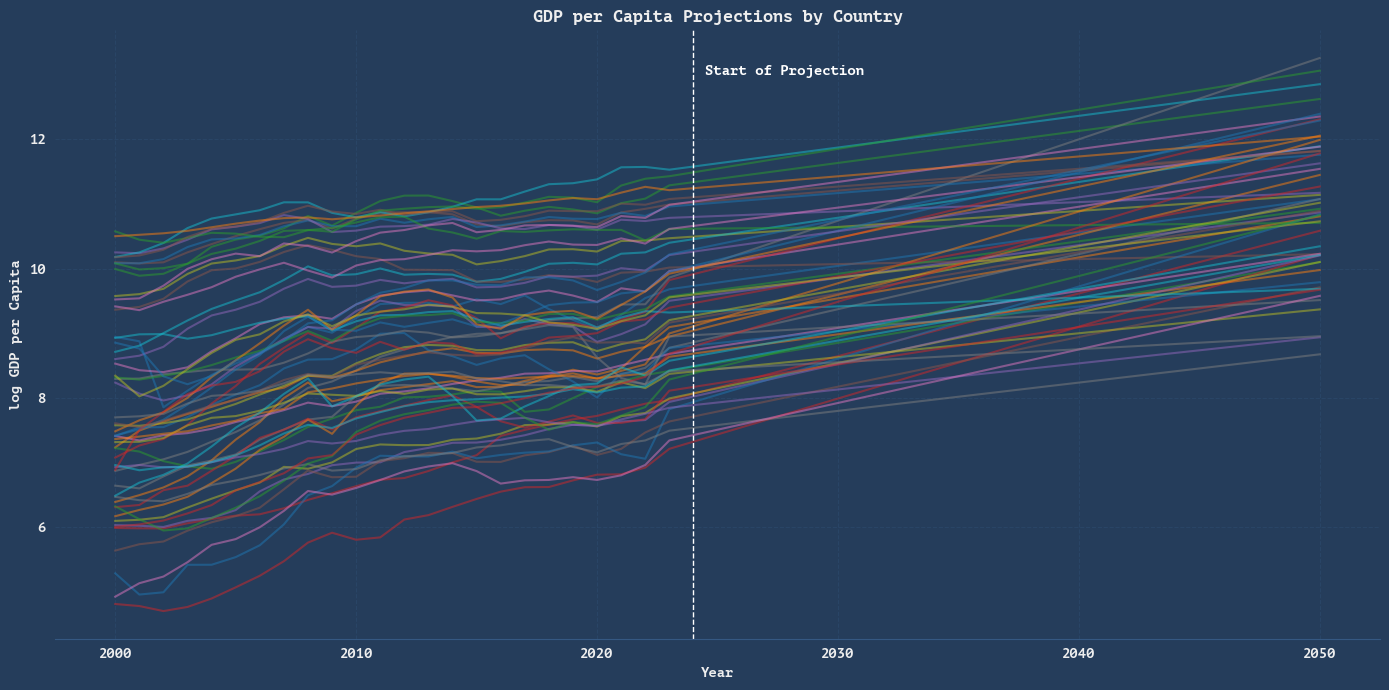

In [46]:
df = df_updated

# Plot
plt.figure(figsize=(14, 7))

for iso, group in df.groupby("ISO3"):
    plt.plot(group["Year"], group["log_GDP_percapita"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("GDP per Capita Projections by Country")
plt.xlabel("Year")
plt.ylabel("log GDP per Capita")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [47]:
# Filter for the year 2050
df_2050 = df[df["Year"] == 2050].copy()

# Sort by GDP_percapita descending and get top 10
top10 = df_2050.sort_values("log_GDP_percapita", ascending=False).head(10)

# Display result
print(top10[["Country", "ISO3", "log_GDP_percapita"]])

            Country ISO3  log_GDP_percapita
407           China  CHN          13.259416
2192      Singapore  SGP          13.063138
1019        Ireland  IRL          12.853837
152       Australia  AUS          12.624712
2090        Romania  ROU          12.394403
1886    New Zealand  NZL          12.353871
1223     Kazakhstan  KAZ          12.310674
2600        Uruguay  URY          12.291839
2141         Russia  RUS          12.056470
2651  United States  USA          12.041496


#### Projection Model

$$
\text{HealthExp\%GDP}_{it} = \beta_0 + \beta_1 \cdot \text{DepOld}_{it} + \beta_2 \cdot \text{DepYoung}_{it} + \beta_3 \cdot \text{LnGDPpc}_{it} + \epsilon_{it}
$$

- $\beta_0$: constant term  
- $\beta_1$: effect of aging 
- $\beta_2$: effect of youth burden 
- $\beta_3$: effect of LnGDP per capita 
- $\epsilon_{it}$: error term for country $i$ in year $t$


#### Health Expenditure Projection

In [48]:
import statsmodels.formula.api as smf
df_model = df[
    (df["Year"] <= 2022) &
    df["Health_Expenditure"].notna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["log_GDP_percapita"].notna()
]

model = smf.ols(
    formula="Health_Expenditure ~ Dependency_Ratio_Old + Dependency_Ratio_Young + log_GDP_percapita",
    data=df_model
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Health_Expenditure   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     392.4
Date:                Sat, 31 May 2025   Prob (F-statistic):          4.92e-179
Time:                        08:08:04   Log-Likelihood:                -2586.1
No. Observations:                1241   AIC:                             5180.
Df Residuals:                    1237   BIC:                             5201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -4

In [49]:
# List of predictors
predictors = ["Dependency_Ratio_Old", "Dependency_Ratio_Young", "log_GDP_percapita"]

# Select data to forecast
df_future = df[
    (df["Year"] > 2022) &
    df["Health_Expenditure"].isna() &
    df["Dependency_Ratio_Old"].notna() &
    df["Dependency_Ratio_Young"].notna() &
    df["log_GDP_percapita"].notna()
].copy()

# Run prediction
df_future["Health_Expenditure"] = model.predict(df_future[predictors])

# Update original dataframe
df.update(df_future)


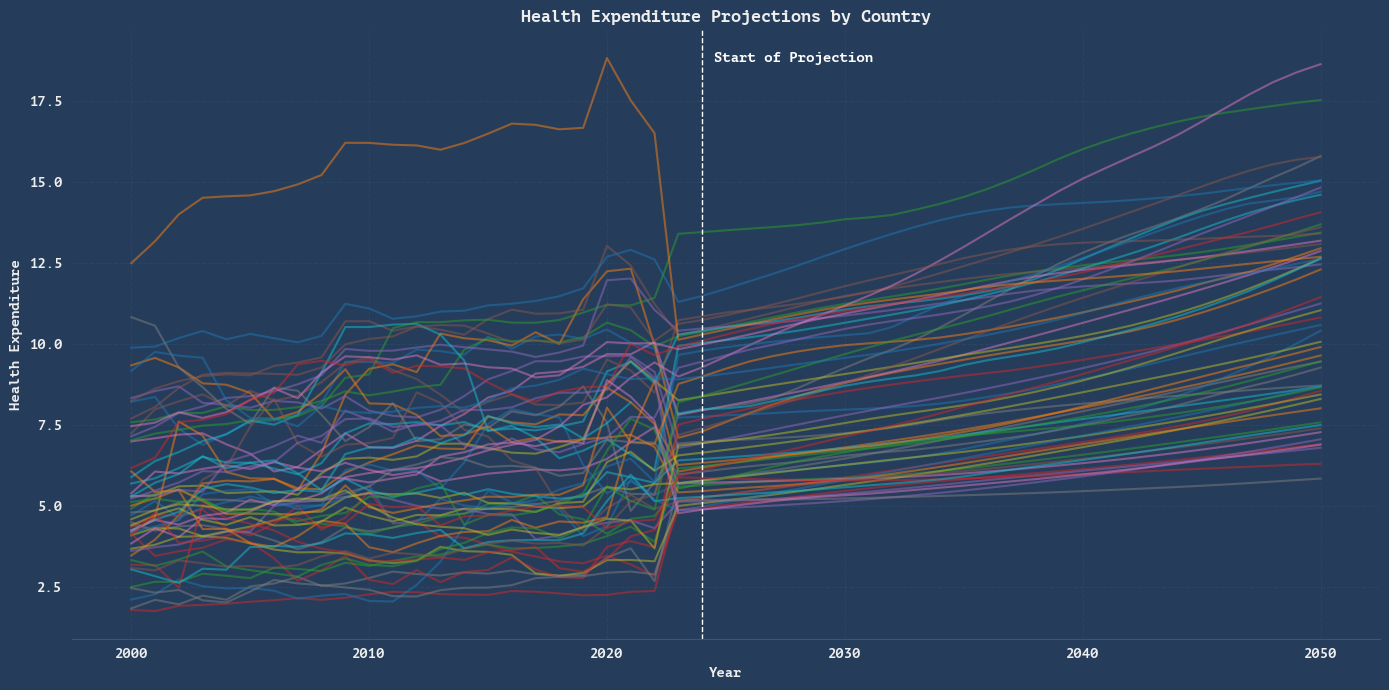

In [50]:
# Plot
plt.figure(figsize=(14, 7))

for iso, group in df.groupby("ISO3"):
    plt.plot(group["Year"], group["Health_Expenditure"], alpha=0.5)  # light lines

# Add vertical line to mark the start of projection (2024)
plt.axvline(x=2024, color='white', linestyle='--', linewidth=1)
plt.text(2024.5, plt.ylim()[1]*0.95, 'Start of Projection', color='white')

plt.title("Health Expenditure Projections by Country")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [51]:
# Filter for the year 2050
df_2050 = df[df["Year"] == 2050].copy()

# Sort by GDP_percapita descending and get top 10
top10 = df_2050.sort_values("Health_Expenditure", ascending=False).head(10)

# Display result
print(top10[["Country", "ISO3", "Health_Expenditure"]])

          Country ISO3  Health_Expenditure
1376  South Korea  KOR           18.623577
1172        Japan  JPN           17.516665
407         China  CHN           15.790127
815        Greece  GRC           15.765559
560       Germany  DEU           15.042839
509       Czechia  CZE           15.033606
2294     Slovakia  SVK           14.821719
2090      Romania  ROU           14.696772
1019      Ireland  IRL           14.601134
2243       Serbia  SRB           14.058830


### Graph change dependency ratio

In [ ]:
sys.path.append('../src/Import_and_Cleaning')
from setup_data_delta import prepare_change_df #Call the graph data preparation function

sys.path.append('../src/visualization')
from visual_bubble import plot_dependency_bubbles #Call the graph visualization function

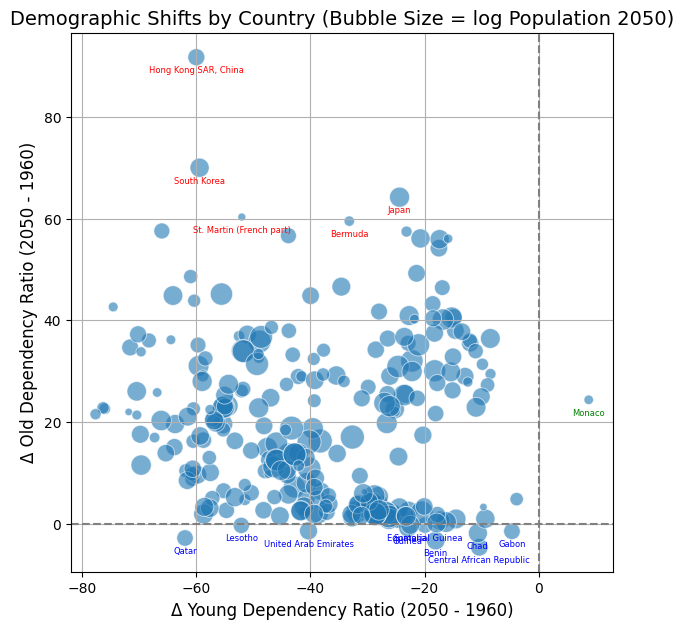

In [11]:
change_df = prepare_change_df()
plot_dependency_bubbles(change_df)

#### Graph Time selected countries

In [4]:
sys.path.append('../src/Import_and_Cleaning')
from setup_data_delta import get_selected_dependency_data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

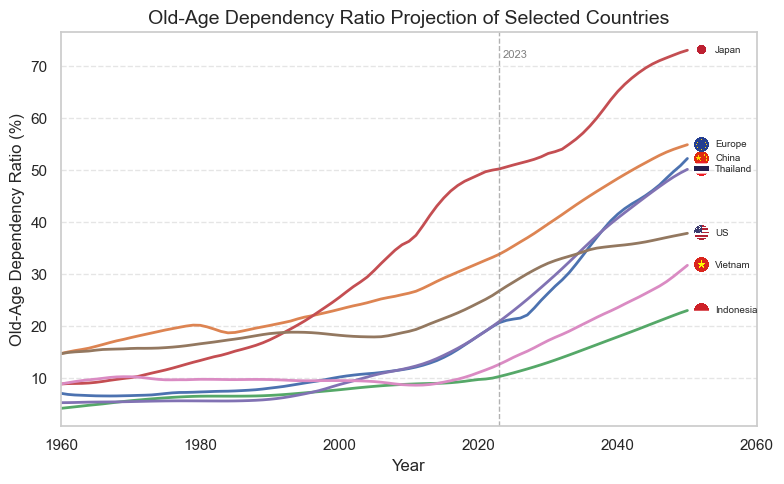

In [19]:
# --- Data ---
df_selected = get_selected_dependency_data()
df_selected.dropna(subset=['Dependency_Ratio_Old'], inplace=True)

# --- Plot Setup ---
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# --- Plot each line individually ---
for country in df_selected['Country_Name'].unique():
    subset = df_selected[df_selected['Country_Name'] == country]
    plt.plot(subset['Year'], subset['Dependency_Ratio_Old'], label=country, linewidth=2)

    # Get the last data point for this country
    last_point = subset.sort_values('Year').iloc[-1]
    x, y = last_point['Year'], last_point['Dependency_Ratio_Old']

    # --- Add flag icon ---
    iso3 = subset['ISO3'].iloc[0]
    flag_path = f"../references/flags/{iso3}.png"
    if os.path.exists(flag_path):
        img = Image.open(flag_path)
        zoom_factor = 0.02  # adjust for size
        imagebox = OffsetImage(img, zoom=zoom_factor)
        ab = AnnotationBbox(imagebox, (x + 1, y), frameon=False, box_alignment=(0, 0.5))
        plt.gca().add_artist(ab)

    # --- Add country name label ---
    plt.text(x + 4, y, country, va='center', fontsize=7)

# --- Plot Formatting ---
plt.title("Old-Age Dependency Ratio Projection of Selected Countries", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Old-Age Dependency Ratio (%)", fontsize=12)
plt.xlim(df_selected['Year'].min(), df_selected['Year'].max() + 10)
plt.axvline(x=2023, color='gray', linestyle='--', linewidth=1, alpha=0.6)
plt.text(2023 + 0.5, plt.ylim()[1] - 5, '2023', color='gray', fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().xaxis.grid(False)  
plt.tight_layout()
plt.show()